# Data Analytics Final Project
## Problem Statement
The global video game industry has evolved significantly over the past decades, driven by technological advancements, changing consumer preferences, and regional market dynamics. Understanding historical sales trends, platform performance, genre popularity, and regional contributions is crucial for identifying patterns that shaped the industry and for guiding future strategies.

## Aim
The aim of this analysis is to perform comprehensive Exploratory Data Analysis (EDA) on historical video game sales data to uncover patterns and trends that explain market behavior. Specifically, we seek to:

- Identify dominant genres and platforms across decades.
- Understand regional sales contributions and global performance.
- Examine the relationship between critic scores and commercial success.
- Highlight historical peaks and shifts in sales trends.
- Provide actionable insights that tell a clear story of how the gaming industry evolved

## Dataset Overview
The dataset contains information about video games, including:
- Title, console, genre, publisher, developer
- Critic score
- Global and regional sales
- Release date and last update
- Image paths (to be removed)

## Steps in This Phase
1. Load the dataset
2. Remove unnecessary columns (image paths)
3. Handle missing values
4. Remove duplicates
5. Correct data types
6. Create derived columns
7. Filter and aggregate data
8. Save cleaned dataset

## Data Dictionary
| Column Name    | Description                                      |
|---------------|--------------------------------------------------|
| img           | Image path (will be removed)                    |
| title         | Game title                                      |
| console       | Console the game was released for               |
| genre         | Genre of the game                               |
| publisher     | Publisher of the game                           |
| developer     | Developer of the game                           |
| critic_score  | Metacritic score (out of 10)                   |
| total_sales   | Global sales of copies in millions             |
| na_sales      | North American sales of copies in millions      |
| jp_sales      | Japanese sales of copies in millions           |
| pal_sales     | European & African sales of copies in millions |
| other_sales   | Rest of world sales of copies in millions      |
| release_date  | Date the game was released                     |
| last_update   | Date the data was last updated                 |

## Step 1: Load the Dataset
We start by importing the dataset and inspecting its structure:
- Number of rows and columns
- Column names and data types


In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('vgchartz-2024.csv')

# Basic overview
print("Shape of dataset:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head())

Shape of dataset: (64016, 14)

Column names: ['img', 'title', 'console', 'genre', 'publisher', 'developer', 'critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales', 'release_date', 'last_update']

Data types:
 img              object
title            object
console          object
genre            object
publisher        object
developer        object
critic_score    float64
total_sales     float64
na_sales        float64
jp_sales        float64
pal_sales       float64
other_sales     float64
release_date     object
last_update      object
dtype: object

First 5 rows:
                                              img                        title  \
0  /games/boxart/full_6510540AmericaFrontccc.jpg           Grand Theft Auto V   
1  /games/boxart/full_5563178AmericaFrontccc.jpg           Grand Theft Auto V   
2                    /games/boxart/827563ccc.jpg  Grand Theft Auto: Vice City   
3  /games/boxart/full_9218923AmericaFrontccc.jpg           Grand Theft Aut

## Step 2: Remove Image Column
The dataset contains an `img` column with image paths, which is not relevant for analysis. We will drop this column.

In [4]:
df = df.drop(columns=['img'], errors='ignore')
print("Columns after removing image column:\n", df.columns)

Columns after removing image column:
 Index(['title', 'console', 'genre', 'publisher', 'developer', 'critic_score',
       'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales',
       'release_date', 'last_update'],
      dtype='object')


## Step 3: Handle Missing Values
Missing values can lead to inaccurate analysis. We will:
- Drop rows where critical info (title, console, genre, publisher) is missing
- Fill missing numeric values (sales and critic_score) with 0
- Fill missing dates with a placeholder or leave as NaT

In [5]:
# Drop rows missing critical info
df = df.dropna(subset=['title', 'console', 'genre', 'publisher'])

# Fill numeric NaNs with 0
numeric_cols = ['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']
df[numeric_cols] = df[numeric_cols].fillna(0)

# Convert release_date and last_update to datetime, fill missing with NaT
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['last_update'] = pd.to_datetime(df['last_update'], errors='coerce')

print("Missing values after cleaning:\n", df.isnull().sum())

Missing values after cleaning:
 title               0
console             0
genre               0
publisher           0
developer          17
critic_score        0
total_sales         0
na_sales            0
jp_sales            0
pal_sales           0
other_sales         0
release_date     7051
last_update     46137
dtype: int64


### Additional Handling for Missing Values
- Filling missing `developer` with "Unknown"
- Deleting rows without any release_date 
- Dropping `last_update` column because it's mostly missing and not useful for analysis

In [6]:
# Fill missing developer with 'Unknown'
df['developer'] = df['developer'].fillna('Unknown')

# Drop last_update column
df = df.drop(columns=['last_update'], errors='ignore')

# Dropping rows without any release date
df = df.dropna(subset=['release_date'])

print("Missing values after final handling:\n", df.isnull().sum())

Missing values after final handling:
 title           0
console         0
genre           0
publisher       0
developer       0
critic_score    0
total_sales     0
na_sales        0
jp_sales        0
pal_sales       0
other_sales     0
release_date    0
dtype: int64


## Step 4: Remove Duplicates
Ensure no duplicate rows remain.

In [7]:
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (56942, 12)


## Step 5: Correct Data Types
We need to ensure columns have appropriate data types:
- Numeric columns → float
- Categorical columns → category

In [8]:
numeric_cols = ['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']
df[numeric_cols] = df[numeric_cols].astype(float)

df['console'] = df['console'].astype('category')
df['genre'] = df['genre'].astype('category')
df['publisher'] = df['publisher'].astype('category')

print(df.dtypes)

title                   object
console               category
genre                 category
publisher             category
developer               object
critic_score           float64
total_sales            float64
na_sales               float64
jp_sales               float64
pal_sales              float64
other_sales            float64
release_date    datetime64[ns]
dtype: object


## Step 6: Create Derived Columns
To make the dataset more insightful for analysis, we will add two new columns:

- **Decade**: This column groups games by the decade they were released in. It helps us analyze trends over time, such as which decades had the most successful games.

- **Score_Category**: This column categorizes games based on their critic score for easier interpretation:
    - **Excellent**: Score ≥ 9
    - **Good**: Score between 7 and 8.9
    - **Average**: Score between 5 and 6.9
    - **Poor**: Score < 5


In [9]:
df['Decade'] = (df['release_date'].dt.year // 10) * 10

# Critic Score Category
def score_category(score):
    if score >= 9:
        return 'Excellent'
    elif score >= 7:
        return 'Good'
    elif score >= 5:
        return 'Average'
    else:
        return 'Poor'
df['Score_Category'] = df['critic_score'].apply(score_category)

print(df[['title', 'release_date', 'Decade','Score_Category']].head())

                         title release_date  Decade Score_Category
0           Grand Theft Auto V   2013-09-17    2010      Excellent
1           Grand Theft Auto V   2014-11-18    2010      Excellent
2  Grand Theft Auto: Vice City   2002-10-28    2000      Excellent
3           Grand Theft Auto V   2013-09-17    2010           Poor
4    Call of Duty: Black Ops 3   2015-11-06    2010           Good


## Step 7: Filter and Aggregate
We will:
- Filter games with **total_sales > 1.5 million units** to focus on high-selling titles.
- Perform aggregations to prepare for Phase 3 visualizations:
    - Total sales by console
    - Total sales by genre
    - Total sales by publisher
    - Total sales by decade
    - Count of games by critic score category


In [10]:
# Filter games with total_sales > 1.5 million
filtered_df = df[df['total_sales'] > 1.5]
print("Shape after filtering:", filtered_df.shape)
print("Sample filtered games:\n", filtered_df[['title', 'total_sales']].head())

# Aggregations
# Total sales by console
console_sales = df.groupby('console', observed=False)['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
print("\nTotal Sales by Console:\n", console_sales)


# Total sales by genre
genre_sales = df.groupby('genre', observed=False)['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
print("\nTotal Sales by Genre:\n", genre_sales)

# Total sales by publisher (top 10)
publisher_sales = df.groupby('publisher', observed=False)['total_sales'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Publishers by Total Sales:\n", publisher_sales)

# Total sales by decade
decade_sales = df.groupby('Decade', observed=False)['total_sales'].sum().reset_index().sort_values(by='Decade')
print("\nTotal Sales by Decade:\n", decade_sales)

# Count of games by critic score category
score_category_count = df['Score_Category'].value_counts()
print("\nGames by Critic Score Category:\n", score_category_count)

Shape after filtering: (814, 14)
Sample filtered games:
                          title  total_sales
0           Grand Theft Auto V        20.32
1           Grand Theft Auto V        19.39
2  Grand Theft Auto: Vice City        16.15
3           Grand Theft Auto V        15.86
4    Call of Duty: Black Ops 3        15.09

Total Sales by Console:
    console  total_sales
52     PS2      1025.36
72    X360       859.41
53     PS3       839.01
51      PS       546.21
54     PS4       539.92
..     ...          ...
63  Series         0.00
71    WinP         0.00
76      XS         0.00
77     ZXS         0.00
78     iOS         0.00

[79 rows x 2 columns]

Total Sales by Genre:
                genre  total_sales
17            Sports      1186.70
0             Action      1124.95
15           Shooter       995.47
7               Misc       556.89
12            Racing       523.51
13      Role-Playing       425.86
10          Platform       349.15
5           Fighting       340.39
2          A

## Step 8: Save Cleaned Dataset
Export cleaned data for Phase 3.

In [11]:
df.to_csv('cleaned_video_game_data.csv', index=False)
print("Cleaned dataset saved as 'cleaned_video_game_data.csv'")

Cleaned dataset saved as 'cleaned_video_game_data.csv'


## Final Step: Display Cleaned Dataset Summary
- We will display :
    - Shape of the dataset: Number of rows and columns.
    - Column info: Data types and non-null counts using info().
    - Missing values check: Ensure no missing values remain.
    - Unique values in categorical columns: Confirm encoding and category distribution.

In [12]:


print(" Final Cleaned Dataset Details\n")

print(f"Shape of the dataset: {df.shape}\n")

print("First 5 rows of the cleaned dataset:")
display(df.head())

print("\nDataset Info:")
df.info()

print("\nMissing Values Check:")
print(df.isnull().sum())

print("\nUnique Values in Categorical Columns:")
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"{col}: {df[col].nunique()} unique values")

 Final Cleaned Dataset Details

Shape of the dataset: (56942, 14)

First 5 rows of the cleaned dataset:


,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,Decade,Score_Category
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,2010,Excellent
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2010,Excellent
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,2000,Excellent
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,0.0,15.86,9.06,0.06,5.33,1.42,2013-09-17,2010,Poor
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2010,Good



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 56942 entries, 0 to 64014
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           56942 non-null  object        
 1   console         56942 non-null  category      
 2   genre           56942 non-null  category      
 3   publisher       56942 non-null  category      
 4   developer       56942 non-null  object        
 5   critic_score    56942 non-null  float64       
 6   total_sales     56942 non-null  float64       
 7   na_sales        56942 non-null  float64       
 8   jp_sales        56942 non-null  float64       
 9   pal_sales       56942 non-null  float64       
 10  other_sales     56942 non-null  float64       
 11  release_date    56942 non-null  datetime64[ns]
 12  Decade          56942 non-null  int32         
 13  Score_Category  56942 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(6


# Phase 3: Exploratory Data Analysis (EDA)

In this phase, we will:
- Load the cleaned dataset from Phase 2
- Perform **Univariate Analysis** (distribution of individual features)
- Perform **Bivariate Analysis** (relationships between two features)
- Perform **Multivariate Analysis** (patterns involving multiple features)
- Summarize key insights after each analysis



###  LOAD CLEANED DATASET


In [13]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cleaned_video_game_data.csv')  
print("Cleaned dataset loaded successfully!")

# Quick check
df.head()


Cleaned dataset loaded successfully!


,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,Decade,Score_Category
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,2010,Excellent
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2010,Excellent
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,2000,Excellent
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,0.0,15.86,9.06,0.06,5.33,1.42,2013-09-17,2010,Poor
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2010,Good



## Step 1: Univariate Analysis
Explore individual features to understand their distributions.


### Genre Distribution

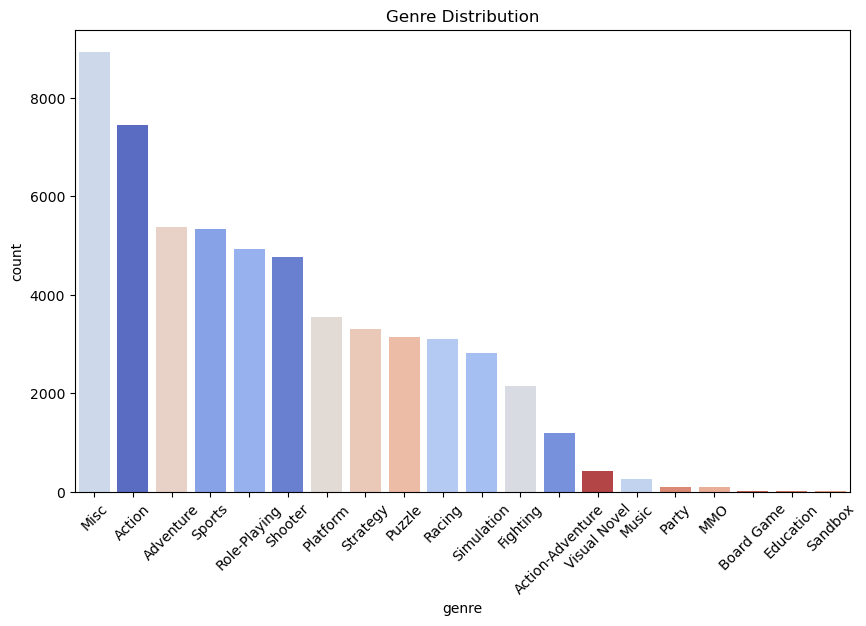

In [26]:



plt.figure(figsize=(10, 6))
genre_order = df['genre'].value_counts().index
sns.countplot(x='genre', data=df, order=genre_order, hue='genre', palette='coolwarm', legend=False)
plt.title('Genre Distribution')
plt.xticks(rotation=45)
plt.show()





#### Insight: Action and Shooter genres dominate, while Puzzle and Strategy are less frequent.

### Top 10 Consoles by Game Count

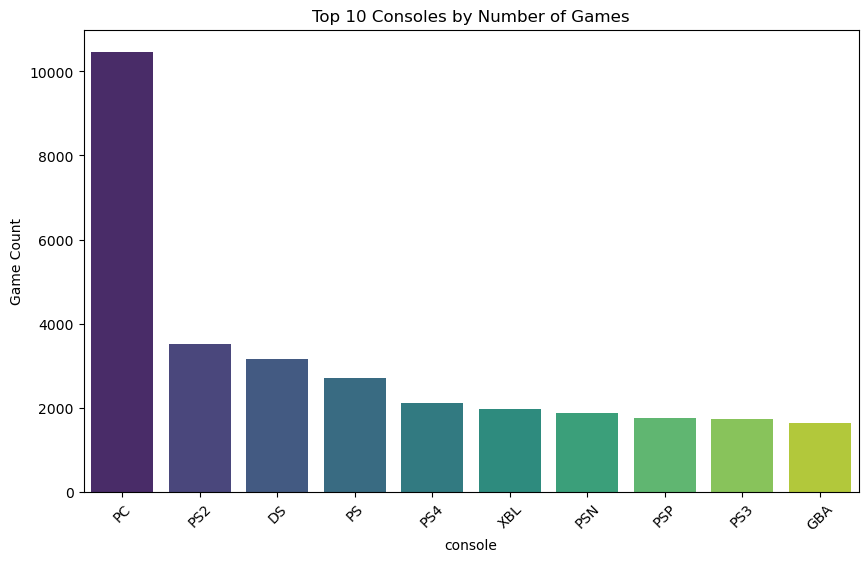

In [27]:

plt.figure(figsize=(10, 6))
console_counts = df['console'].value_counts().head(10)
sns.barplot(x=console_counts.index, y=console_counts.values, hue=console_counts.index, palette='viridis', legend=False)
plt.title('Top 10 Consoles by Number of Games')
plt.ylabel('Game Count')
plt.xticks(rotation=45)
plt.show()



#### Insight: PS2 and PC have the highest number of games, indicating their popularity.

### Decade Distribution

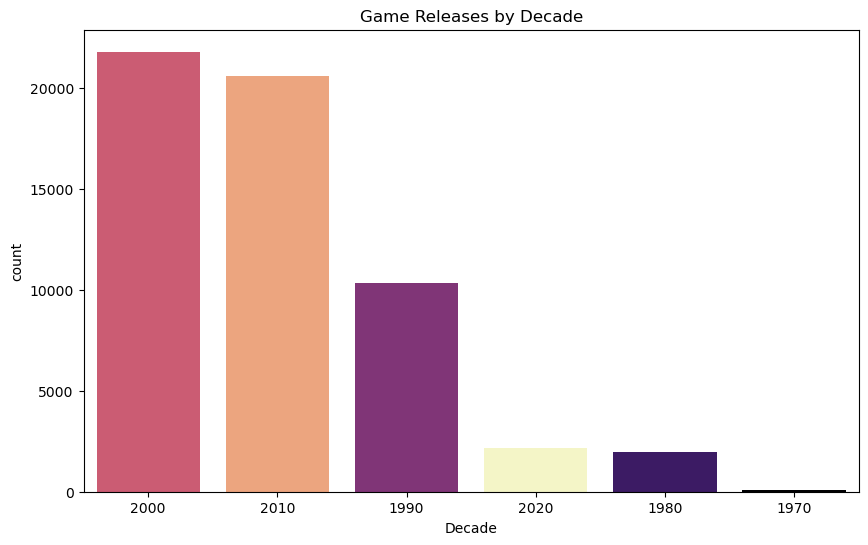

In [30]:

plt.figure(figsize=(10, 6))
decade_order = df['Decade'].value_counts().index
sns.countplot(x='Decade', data=df, order=decade_order, hue='Decade', palette='magma', legend=False)
plt.title('Game Releases by Decade')
plt.show()




#### Insight: 2000s and 2010s dominate game releases.

### Global Sales Distribution

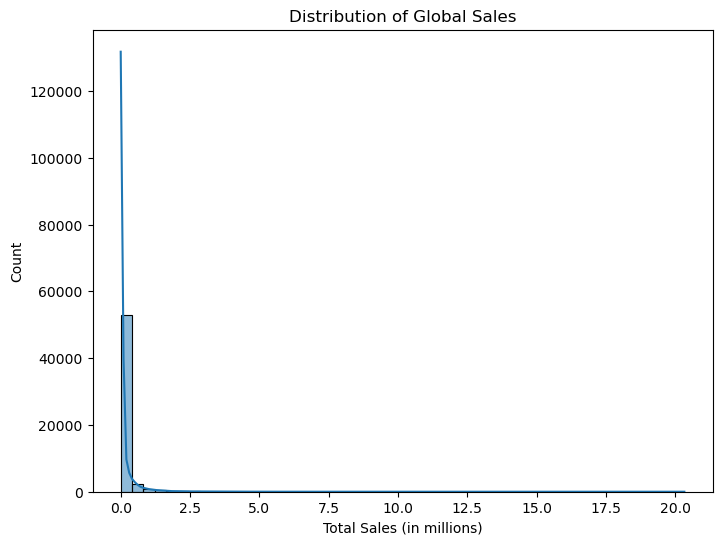

In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(df['total_sales'], bins=50, kde=True)
plt.title('Distribution of Global Sales')
plt.xlabel('Total Sales (in millions)')
plt.show()


#### Insight: Most games sell under 5 million units, few blockbusters exceed 10 million.

### Regional Sales Distributions

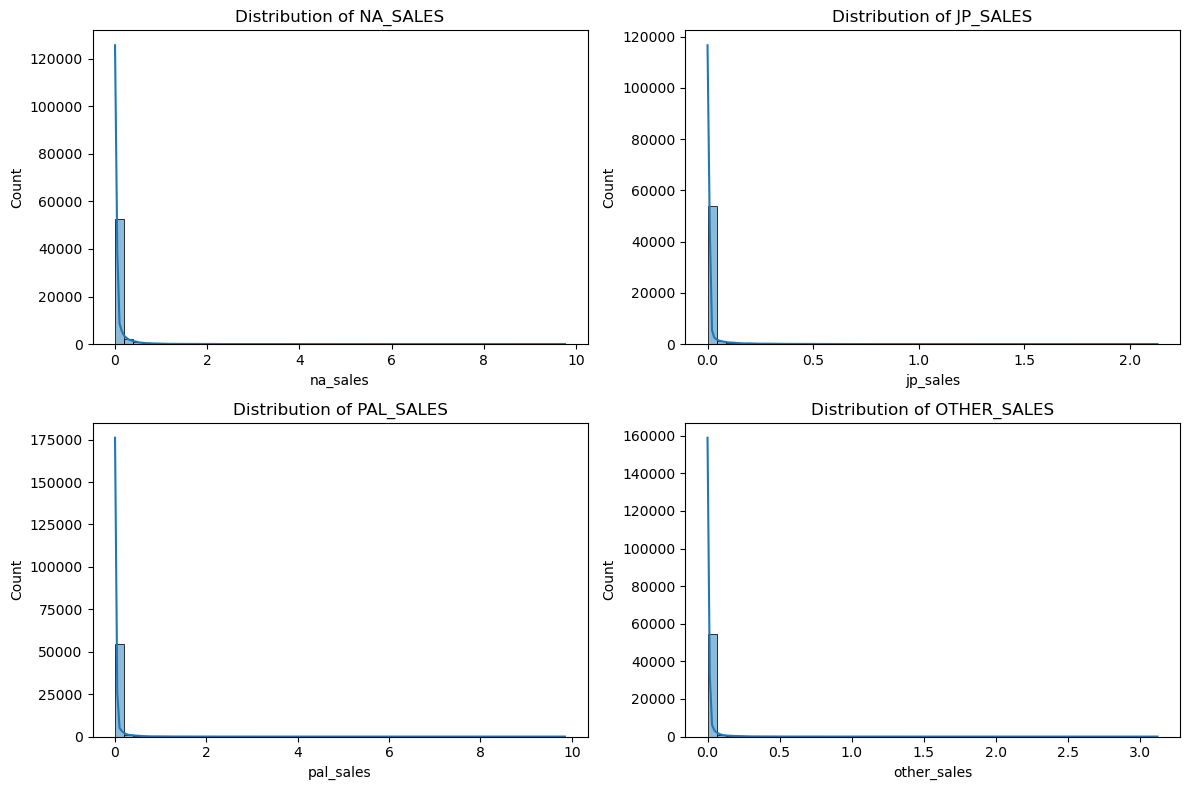

In [32]:
regions = ['na_sales', 'jp_sales', 'pal_sales', 'other_sales']
plt.figure(figsize=(12, 8))
for i, region in enumerate(regions, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[region], bins=50, kde=True)
    plt.title(f'Distribution of {region.upper()}')
plt.tight_layout()
plt.show()


#### Insight: North America leads sales, followed by PAL regions. Japan has fewer high-selling games.


## Step 2: Bivariate Analysis
Explore relationships between two variables.


### Correlation Heatmap

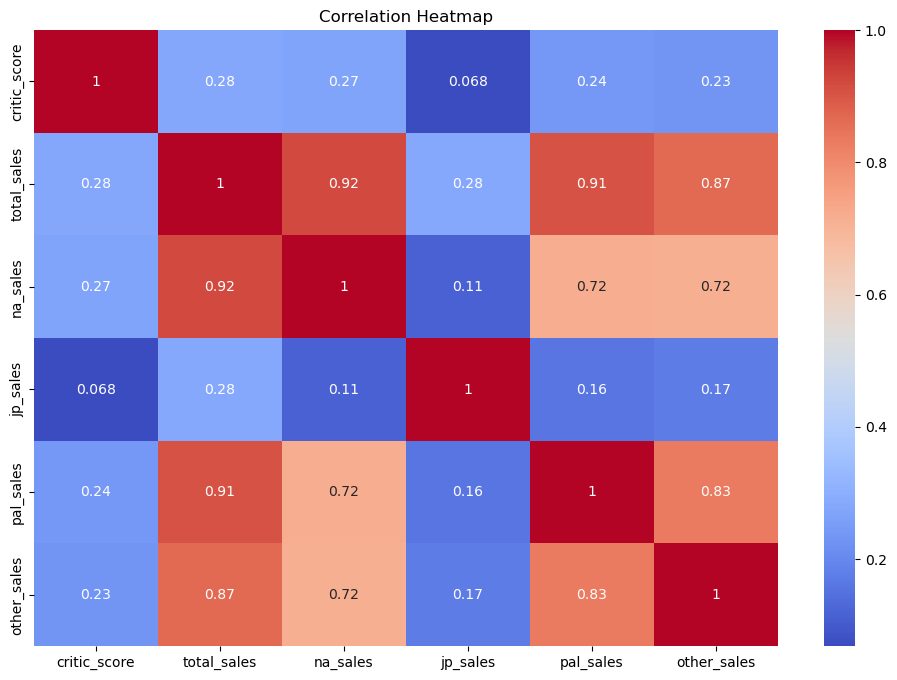

In [33]:

num_cols = ['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


#### Insight: total_sales strongly correlates with na_sales and pal_sales. Critic score correlation is weak.

### Critic Score vs Global Sales

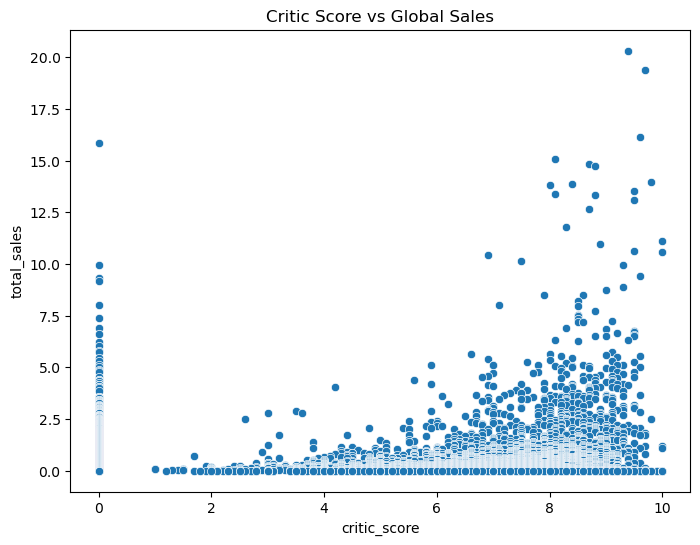

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=df)
plt.title('Critic Score vs Global Sales')
plt.show()


#### Insight: Higher critic scores slightly increase global sales, but the relationship is not strong.


### Global Sales by Genre

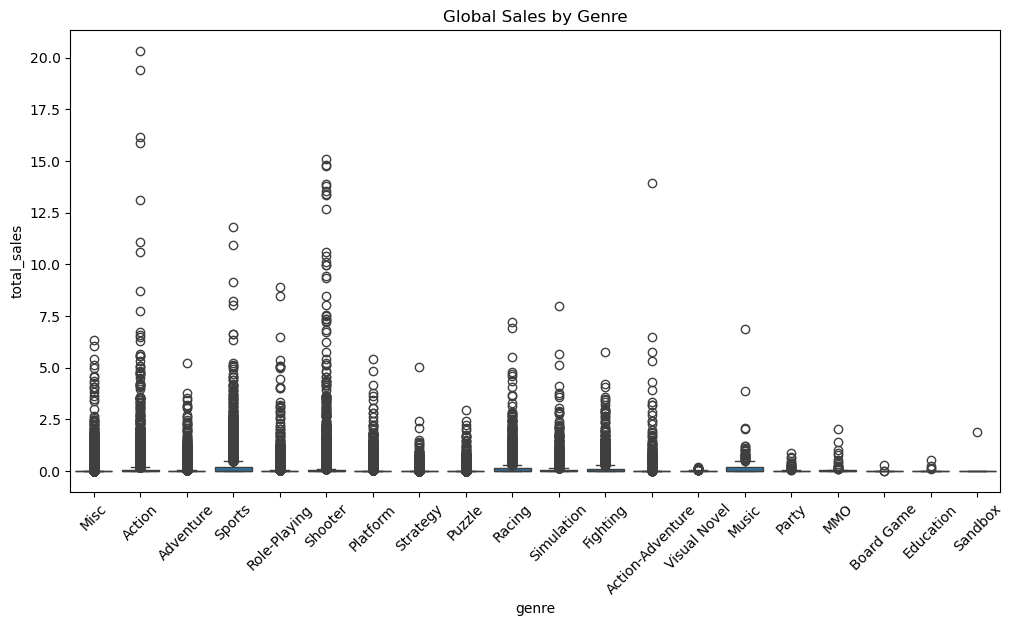

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='total_sales', data=df, order=genre_order)
plt.xticks(rotation=45)
plt.title('Global Sales by Genre')
plt.show()


#### Insight: Shooter and Sports genres have higher median global sales compared to Puzzle or Strategy.

### Global Sales by Top Consoles

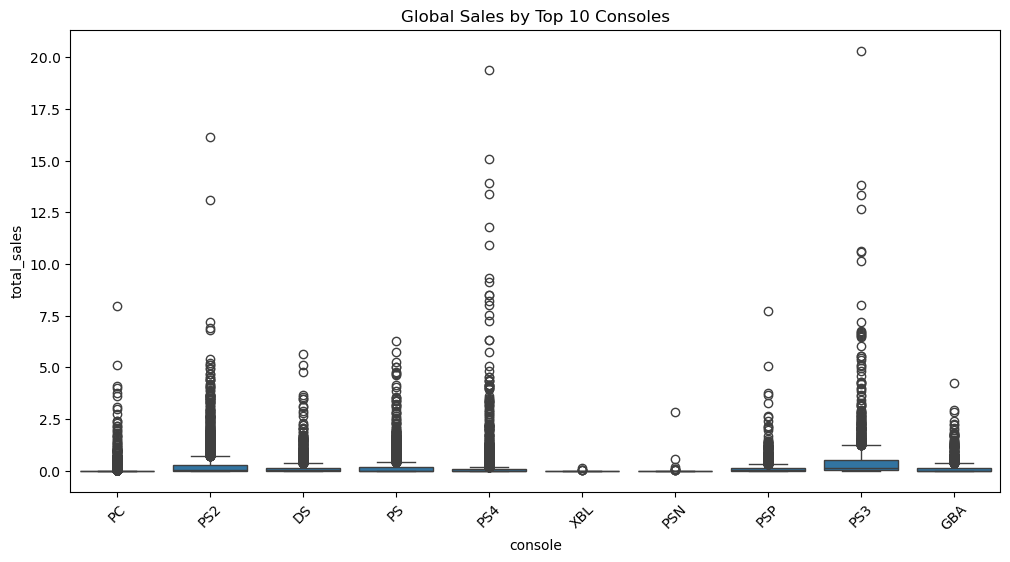

In [36]:
plt.figure(figsize=(12, 6))
top_consoles = df['console'].value_counts().head(10).index
sns.boxplot(x='console', y='total_sales', data=df[df['console'].isin(top_consoles)], order=top_consoles)
plt.xticks(rotation=45)
plt.title('Global Sales by Top 10 Consoles')
plt.show()



#### Insight: Wii and PS3 show higher median global sales compared to handheld consoles.


## Step 4: Multivariate Analysis
Explore patterns involving multiple variables.


### Pairplot for Key Numeric Features

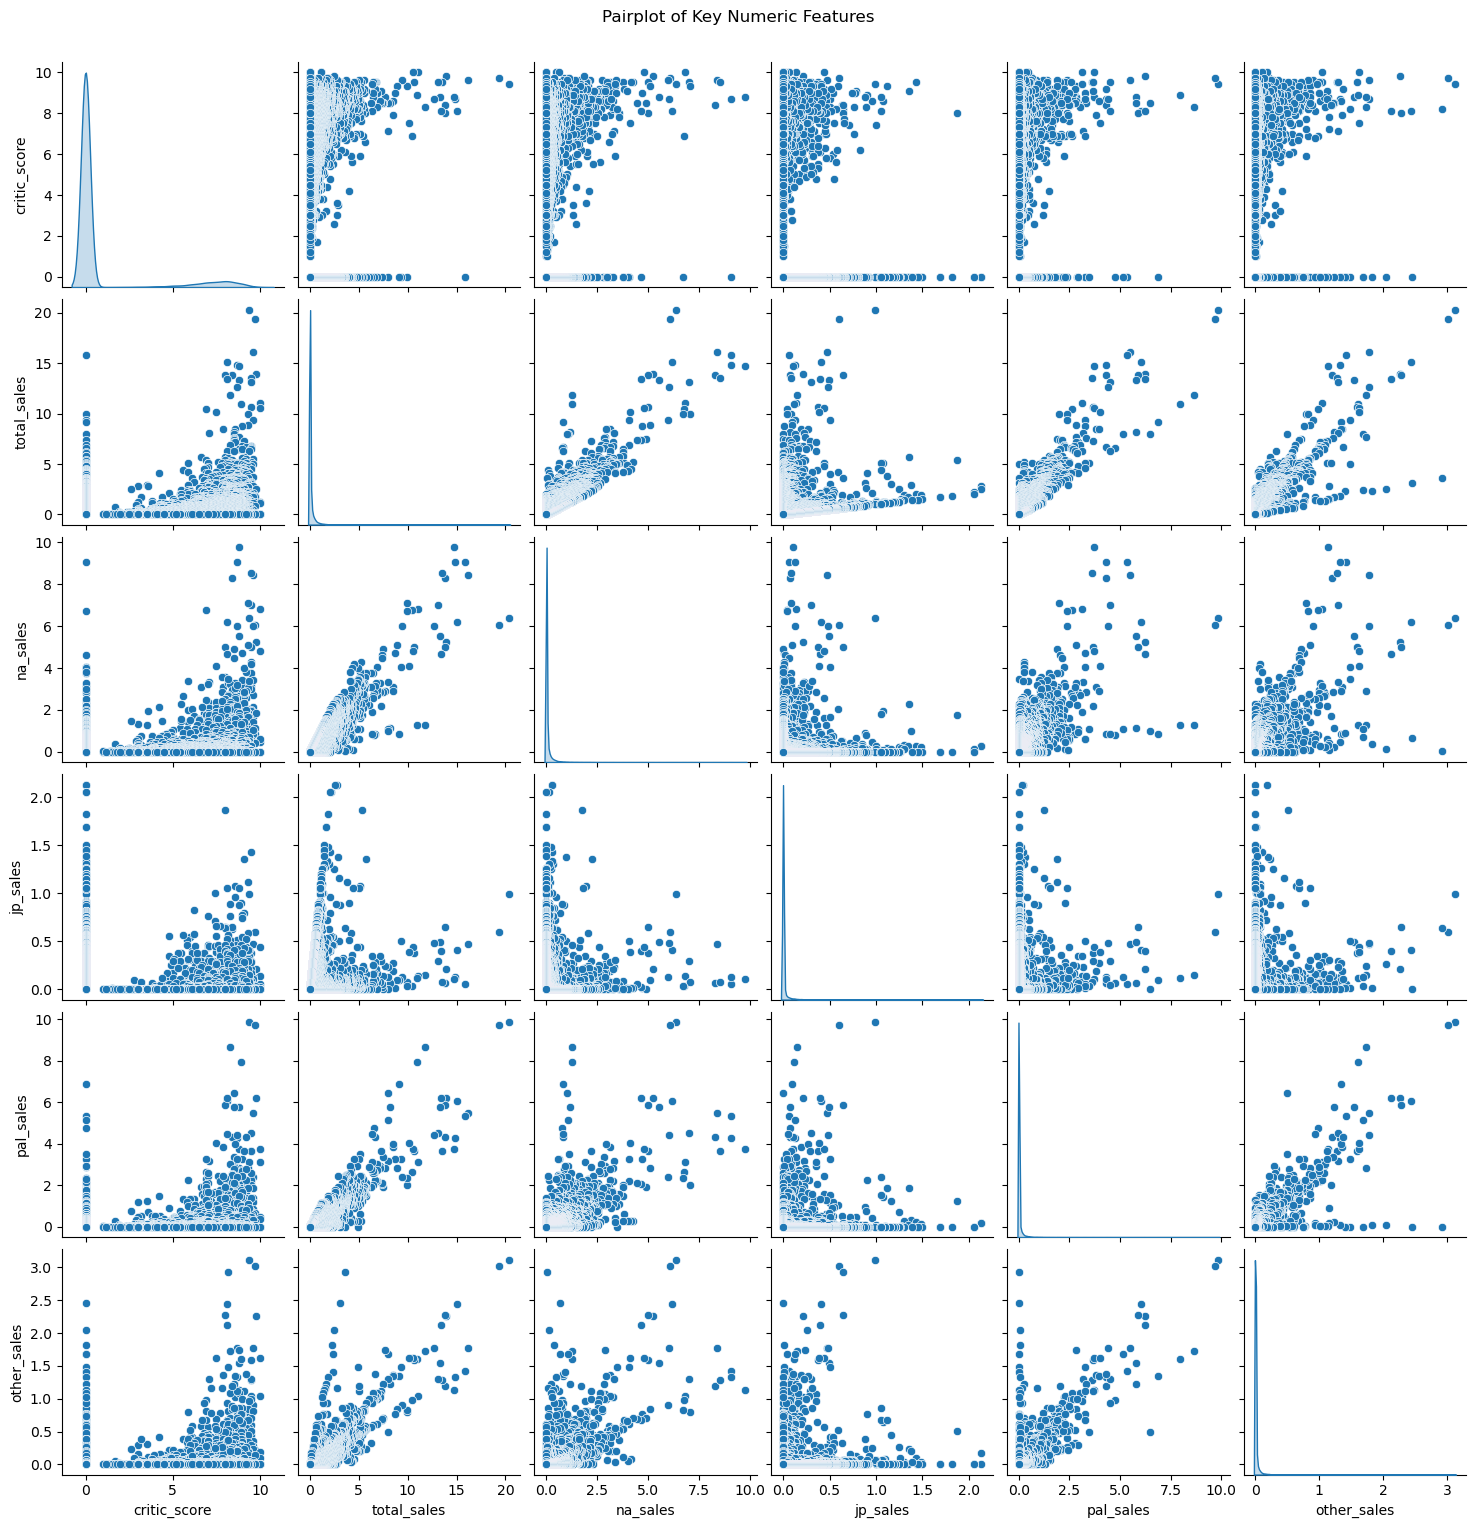

In [37]:
sns.pairplot(df[num_cols], diag_kind='kde')
plt.suptitle('Pairplot of Key Numeric Features', y=1.02)
plt.show()


#### Insight: Strong positive correlation between total_sales and na_sales/pal_sales. Critic score shows weak correlation.

### Genre vs Console vs Global Sales (Heatmap)

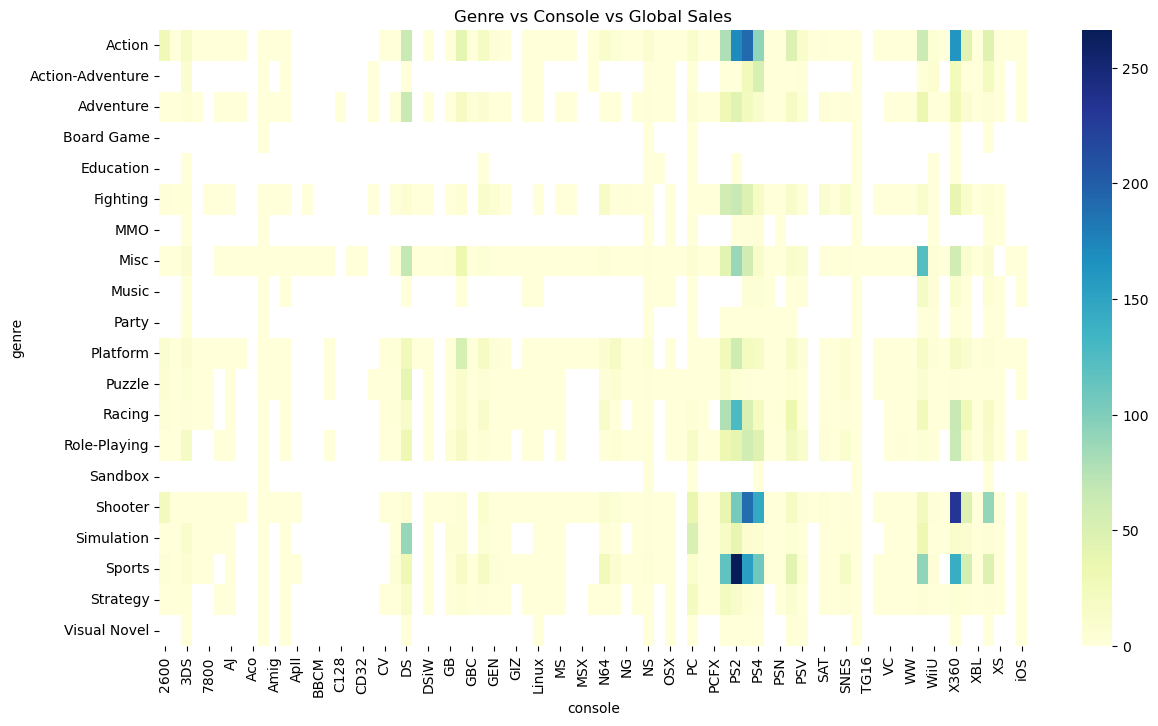

In [38]:
pivot_table = df.pivot_table(values='total_sales', index='genre', columns='console', aggfunc='sum')
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Genre vs Console vs Global Sales')
plt.show()


#### Insight: Shooter games dominate Xbox and PS platforms, while Role-Playing thrives on handheld consoles.

### Yearly Trend of Global Sales

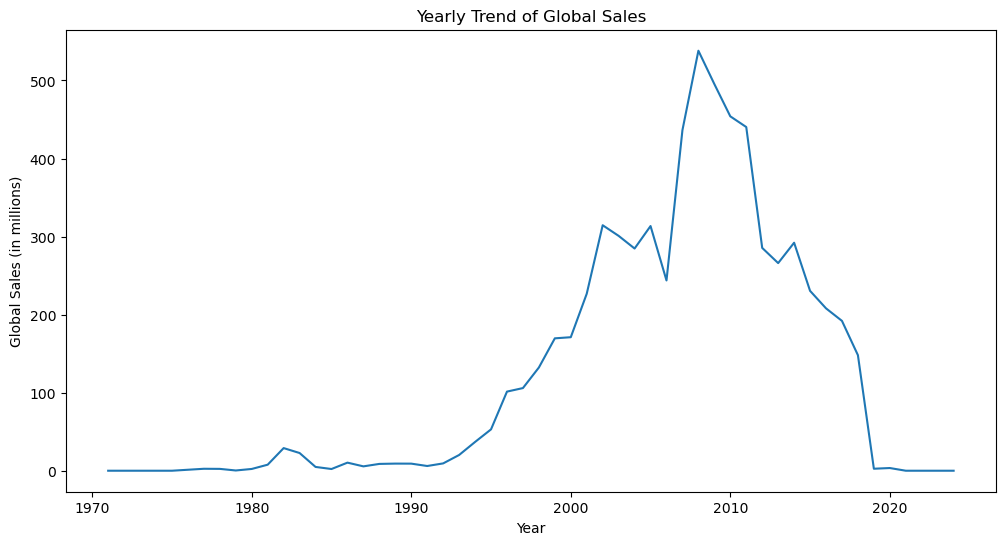

In [39]:
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year
yearly_sales = df.groupby('release_year')['total_sales'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title('Yearly Trend of Global Sales')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.show()



#### Insight: Global sales peaked around 2008, then declined after 2011 due to market shifts.



## Key Insights and Summary of EDA

**1. Genre Trends**  
Action and Shooter genres dominate the gaming landscape, while Puzzle and Strategy remain niche. This shows the industry’s focus on high-action experiences over casual or strategic gameplay.

**2. Platform Paradox**  
PS2 and PC have the largest game libraries, reflecting their long lifespans and developer accessibility. However, Wii and PS3 outperform in median global sales, proving that fewer titles with strong appeal can generate higher success per game.

**3. Regional Dynamics**  
North America drives the majority of global sales, followed by PAL regions (Europe & Australia). Japan contributes significantly but remains smaller compared to Western markets, highlighting regional preferences.

**4. Critic Score Impact**  
Higher critic scores show only a weak correlation with global sales. While quality matters, brand power and marketing seem to play a bigger role in driving blockbuster success.

**5. Sales Over Time**  
Global sales peaked between 2006–2011, coinciding with the rise of consoles like PS3, Xbox 360, and Wii. After 2011, sales declined, signaling a shift toward mobile gaming and digital distribution.

**6. Genre-Platform Synergy**  
Shooter games dominate Xbox and PlayStation platforms, while Role-Playing thrives on handheld consoles. This reflects how platform capabilities influence genre popularity.

